In [47]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Загрузка набора MNIST(70 тыс изобр)

In [48]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

вывод изображения

In [49]:
pd.set_option('display.max_columns',500)
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


цифры это интенсиность цвета по пикселям

Для более наглядного изображения используем матплотлиб и серую палитру

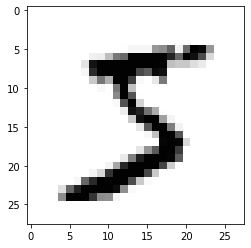

In [50]:
plt.imshow(X_train[0], cmap = "Greys")

строка и столбец максимальной интенсивности по номеру строк и столбцов

In [51]:
def convert_intensity(x):
    data = [[]]*len(x)
    for i in range(len(x)):
        data[i] = [np.argmax(np.mean(x[i],axis=0)),np.argmax(np.mean(x[i],axis=1)),np.mean(np.argmax(x[i],axis = 0)), np.mean(np.argmax(x[i],axis=0)),np.mean(np.argmax(x[i],axis=1))]
    return pd.DataFrame(data)

In [52]:
data = convert_intensity(X_train)
data.head()

,0,1,2,3,4
0,13,7,8.214286,8.214286,9.178571
1,20,8,6.321429,6.321429,10.392857
2,18,15,9.500000,9.500000,11.107143
3,11,20,6.500000,6.500000,9.892857
4,15,15,5.535714,5.535714,9.357143


 Построение модели опорных векторов по собраноой статистике

In [53]:
model = SVC().fit(data, y_train)

предсказание значений по проверочной выборке

In [54]:
data_test = convert_intensity(X_test)
result = np.round(model.predict(data_test)).astype(int)

In [55]:
print(result[0:50])
print(y_test[0:50])

[7 6 1 6 2 7 4 4 4 6 0 6 9 5 1 5 4 7 0 4 9 6 6 8 4 6 7 4 0 1 8 1 9 2 3 0 7
 1 2 1 1 7 9 2 1 8 1 2 9 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


Оценка точности

In [56]:
print(classification_report(result,y_test,digits = 4))

              precision    recall  f1-score   support

           0     0.7347    0.7461    0.7404       965
           1     0.6458    0.7659    0.7008       957
           2     0.5853    0.5864    0.5858      1030
           3     0.5515    0.5413    0.5463      1029
           4     0.6660    0.5150    0.5808      1270
           5     0.2657    0.5411    0.3564       438
           6     0.6524    0.5744    0.6109      1088
           7     0.7879    0.5761    0.6656      1406
           8     0.4055    0.5025    0.4489       786
           9     0.5421    0.5306    0.5363      1031

    accuracy                         0.5882     10000
   macro avg     0.5837    0.5879    0.5772     10000
weighted avg     0.6155    0.5882    0.5951     10000

